# Dataset 
## 2021-08-31-3x3x3-z20.0toz20.02-tiling
try to make a thinner view (thinner in the vertical position) just so it i seasier to look at the range of tiling in z.


This is collagen embedded RAW264.7 cells. (collagen + RAW264.7 cells)

go to the data folder on LC

`getconda
conda activate llsmvis
scp /g/g92/yi10/llsmvis/tools/getdsk .
chmod u+rwx ./getdsk
./getdsk`



In [3]:
result_folder='/p/lscratchh/yi10/llsm-data/2021-08-30-Collagen-RAW264.7-Tiling-3x3x3-z20.0toz20.02/results_dsk'

In [4]:
import os
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# need to write something to tile the XY tiles into a big image.

In [218]:
def stitch_10x10_tiles(xymip_list):
    tiled = [];
    return tiled

def read_a_tile_MIPxy(MIPs_all, tile_ind):
    arr = io.imread(MIPs_all[0][tile_ind])
    return arr

def get_paths_to_MIPs_sorted(result_folder):
    mipsall=[]
    for mipstr in ['MIP_channel0_XY.tif', 'MIP_channel0_XZ.tif', 'MIP_channel0_YZ.tif']:
        mips=[]
        tile_folders = [f for f in os.listdir(result_folder) if os.path.isfile(os.path.join(result_folder, f, mipstr)) and f.startswith('Tile')]
        for i in np.arange(0,len(tile_folders)):
            x=[g for g in tile_folders if g.startswith('Tile'+str(i)+'_')]
            mips.append(os.path.join(result_folder, x[0], mipstr))
        mipsall.append(mips)
    return mipsall

def plt_nxm_tiles_MIPxy(xyMIPs_paths,n=5,m=5):
    plt.figure(figsize=(15,15))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(xyMIPs_paths[0][ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr.T))
            plt.title('(XY mip) - Tile '+str(ind))
            plt.axis('off')

def plt_nxm_tiles_MIPs_XZ(MIPs,n=5,m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n, m, ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(XZ mip) Tile '+str(ind))
            plt.axis('off')


def plt_nxm_tiles_MIPs_YZ(MIPs, n=5, m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(YZ mip) Tile '+str(ind))
            plt.axis('off')

def plot_a_tile(tile_ind,MIPs_all):
    plt.figure(figsize=(15,15))
    arr1 = io.imread(MIPs_all[0][tile_ind])
    arr2 = io.imread(MIPs_all[1][tile_ind])
    arr3 = io.imread(MIPs_all[2][tile_ind])
    plt.imshow(np.flipud(arr1.T))
    plt.title('(XY mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((arr2))
    plt.title('(XZ mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(arr3))
    plt.title('(YZ mip) Tile '+str(tile_ind))
    plt.axis('off')

def plot_two_tiles(tile_inda, tile_indb, MIPs_all):
    plt.figure(figsize=(15,15))
    a1 = io.imread(MIPs_all[0][tile_inda])
    a2 = io.imread(MIPs_all[1][tile_inda])
    a3 = io.imread(MIPs_all[2][tile_inda])
    b1 = io.imread(MIPs_all[0][tile_indb])
    b2 = io.imread(MIPs_all[1][tile_indb])
    b3 = io.imread(MIPs_all[2][tile_indb])
    plt.subplot(1,2,1)
    plt.imshow(np.flipud(a1.T))
    plt.title('(XY mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(np.flipud(b1.T))
    plt.title('(XY mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((a2))
    plt.title('(XZ mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(2,1,2)
    plt.imshow((b2))
    plt.title('(XZ mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow(np.flipud(a3))
    plt.title('(YZ mip) Tile '+str(tile_inda))
    plt.axis('off')    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(b3))
    plt.title('(YZ mip) Tile '+str(tile_indb))
    plt.axis('off')

In [219]:
MIPs_paths=get_paths_to_MIPs_sorted(result_folder)

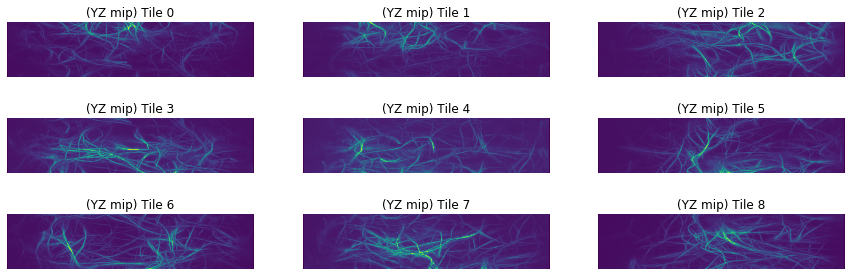

In [220]:
plt_nxm_tiles_MIPs_YZ(MIPs_paths[2],n=3,m=3)

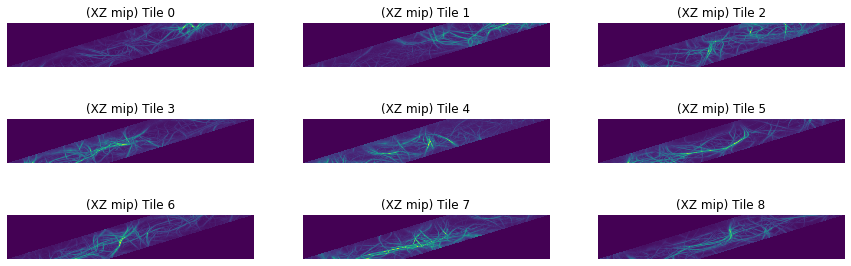

In [14]:
plt_nxm_tiles_MIPs_XZ(MIPs_paths[1],n=3,m=3)

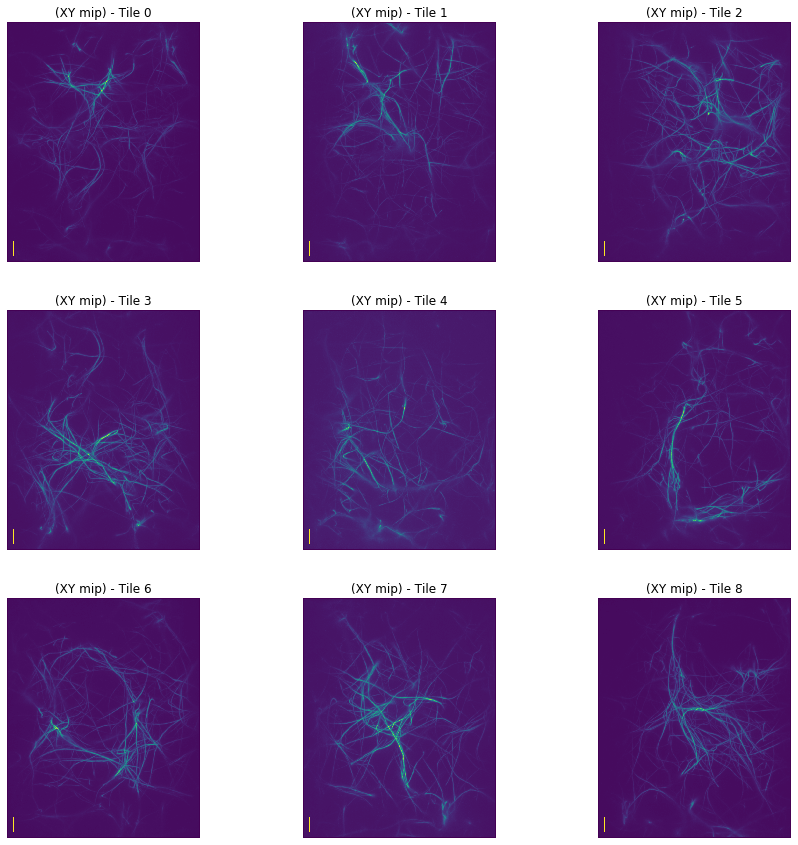

In [15]:
plt_nxm_tiles_MIPxy(MIPs_paths,n=3,m=3)

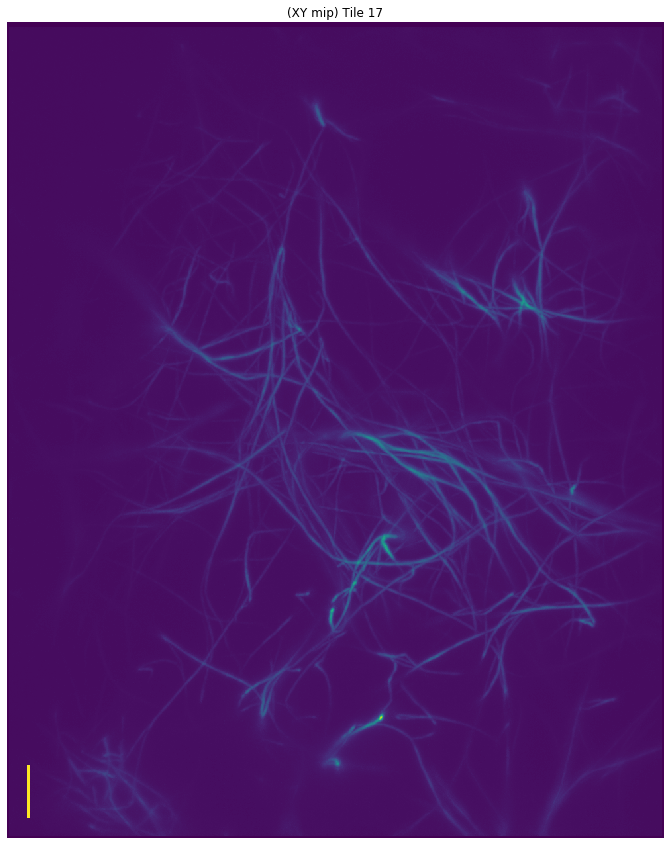

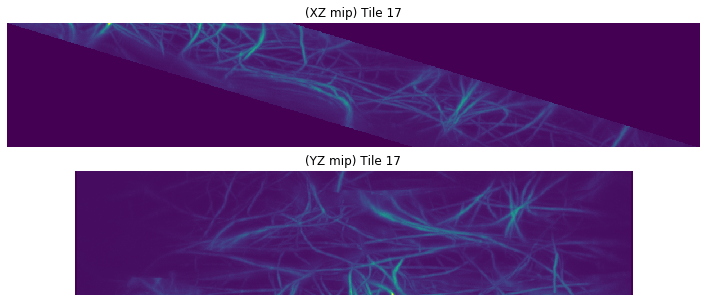

In [16]:
plot_a_tile(17,MIPs_paths)

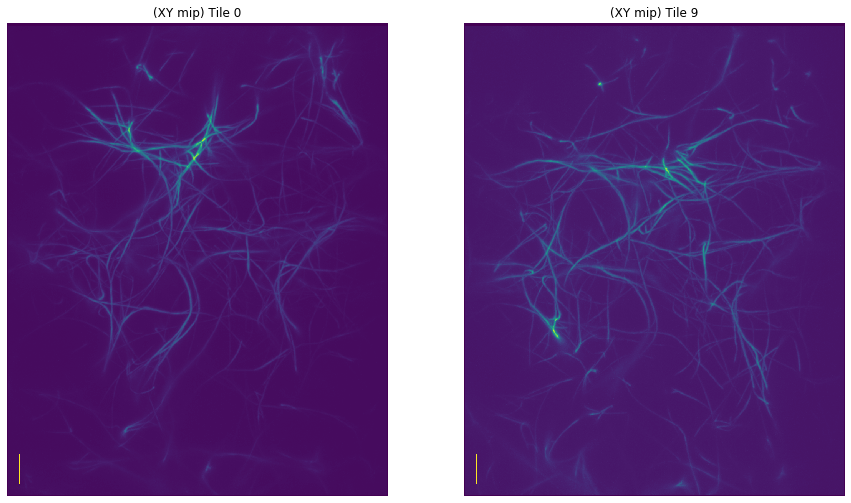

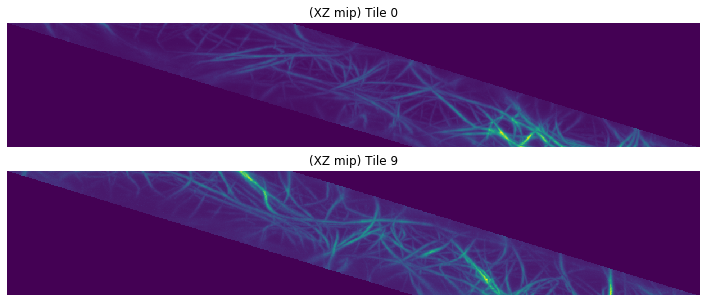

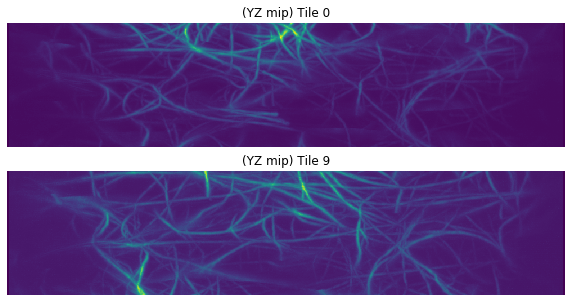

In [17]:
plot_two_tiles(0,9,MIPs_paths)

In [221]:
def stitch_UD(U,D,du,dd,overlap=True,showim=False, choosemax=True):
    dimU=U.shape
    dimD=D.shape
    if overlap is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=M[-dimD[0]:,:]+D
    elif choosemax is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=np.maximum(M[-dimD[0]:,:],D)
        print('choose max')
    else:
        M=np.concatenate([U[0:-du,:],D[dd:,:]])
        
    if showim is True:
        plt.figure(figsize=(15,15))
        plt.imshow(M)
        
    return M

def stitch_3x3_XY(ts,du1,dd1, du2,dd2, overlap=True, showim=True, choosemax=True):
    U=ts[0][3:-2]
    D=ts[1][3:-2]
    D2=ts[2][3:-2]
    U2=stitch_UD(U,D,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
    T012=stitch_UD(U2,D2,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
    
    U=ts[3][3:-2]
    D=ts[4][3:-2]
    D2=ts[5][3:-2]
    U2=stitch_UD(U,D,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
    T345=stitch_UD(U2,D2,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)

    U=ts[6][3:-2]
    D=ts[7][3:-2]
    D2=ts[8][3:-2]
    U2=stitch_UD(U,D,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
    T678=stitch_UD(U2,D2,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)

    U=np.flipud(T012.T)
    D=np.flipud(T345.T)
    D2=np.flipud(T678.T)
    U2=stitch_UD(U,D,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    TTT=stitch_UD(U2,D2,du=du2,dd=dd2, overlap=overlap, showim=showim, choosemax=choosemax)
    return TTT

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

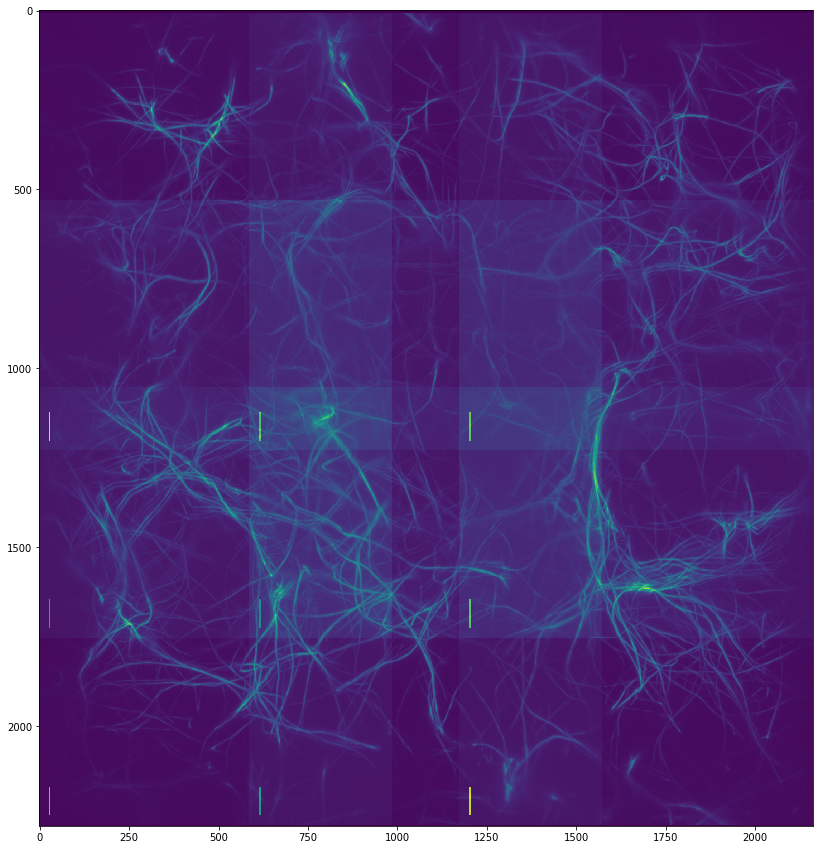

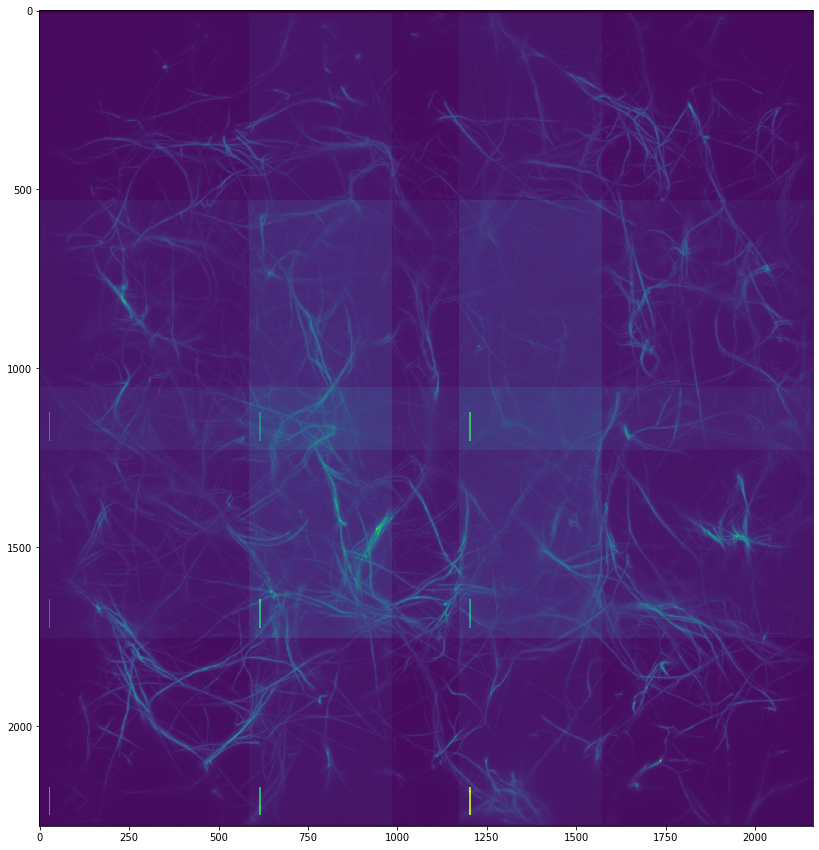

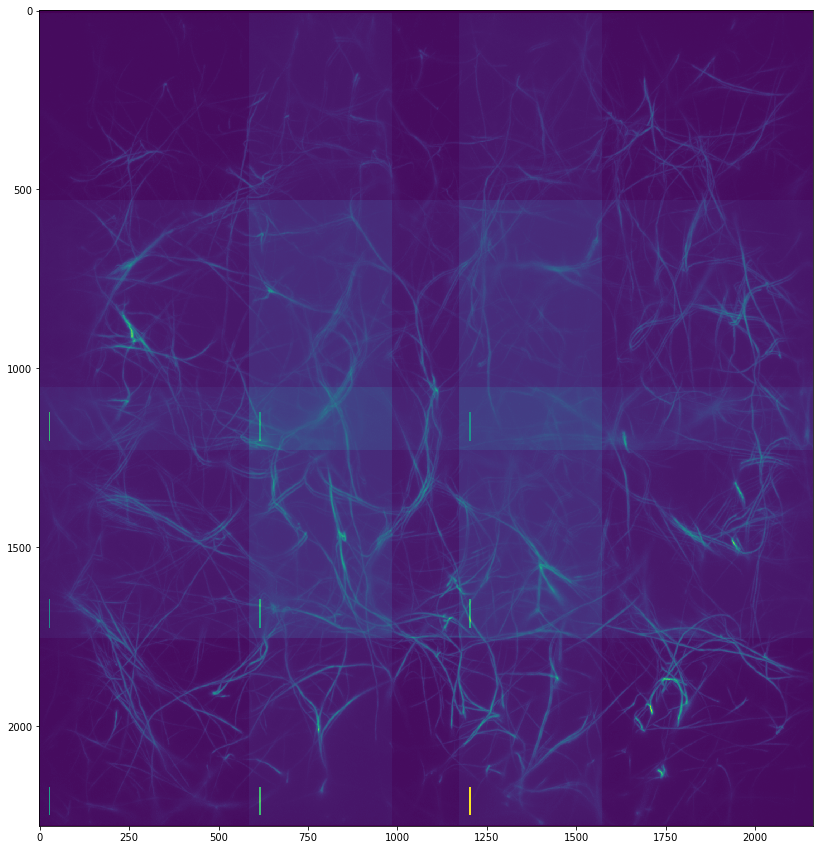

In [230]:
ts1=[read_a_tile_MIPxy(MIPs_paths, x) for x in np.arange(9)+0]
ts2=[read_a_tile_MIPxy(MIPs_paths, x) for x in np.arange(9)+9]
ts3=[read_a_tile_MIPxy(MIPs_paths, x) for x in np.arange(9)+18]
stitch_3x3_XY(ts1,du1=180,dd1=220, du2=350,dd2=360, overlap=True, showim=True, choosemax=False)
stitch_3x3_XY(ts2,du1=180,dd1=220, du2=350,dd2=360, overlap=True, showim=True, choosemax=False)
stitch_3x3_XY(ts3,du1=180,dd1=220, du2=350,dd2=360, overlap=True, showim=True, choosemax=False)


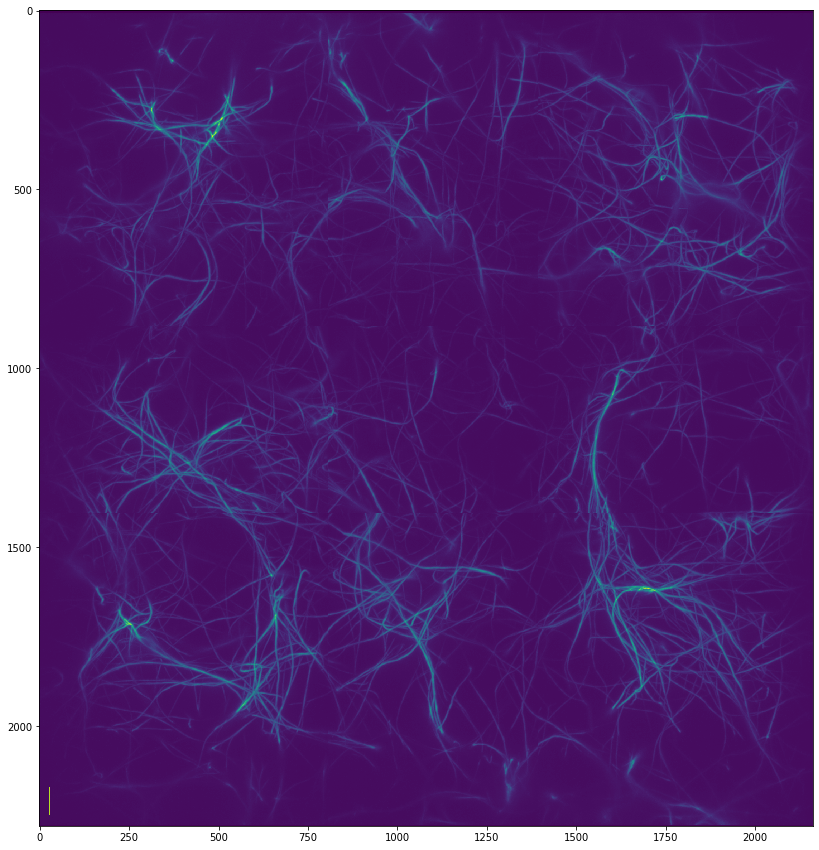

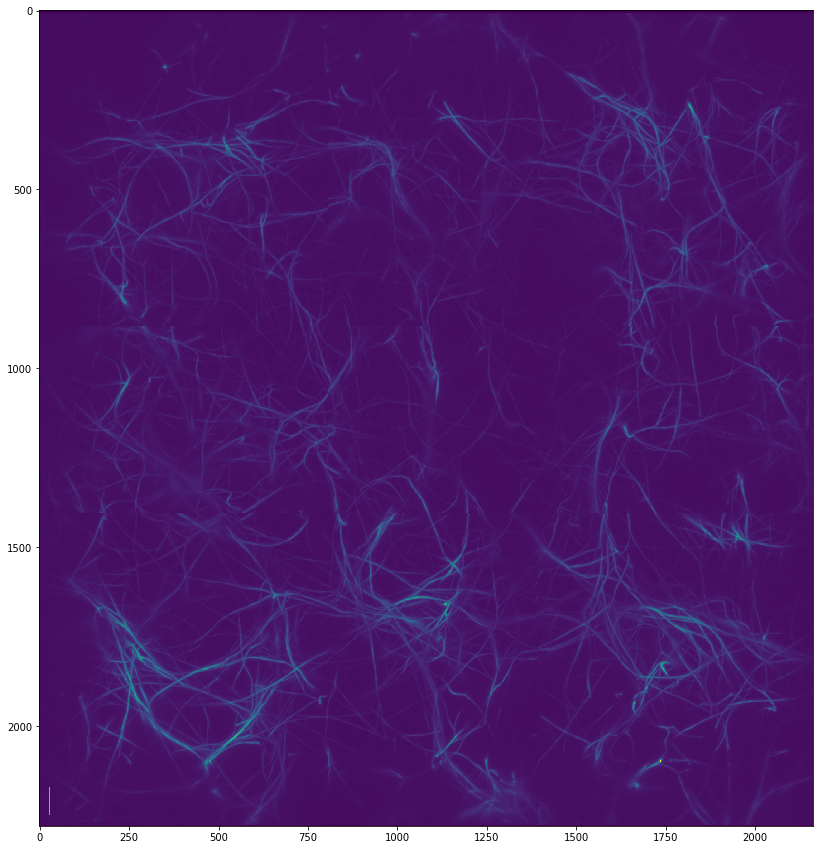

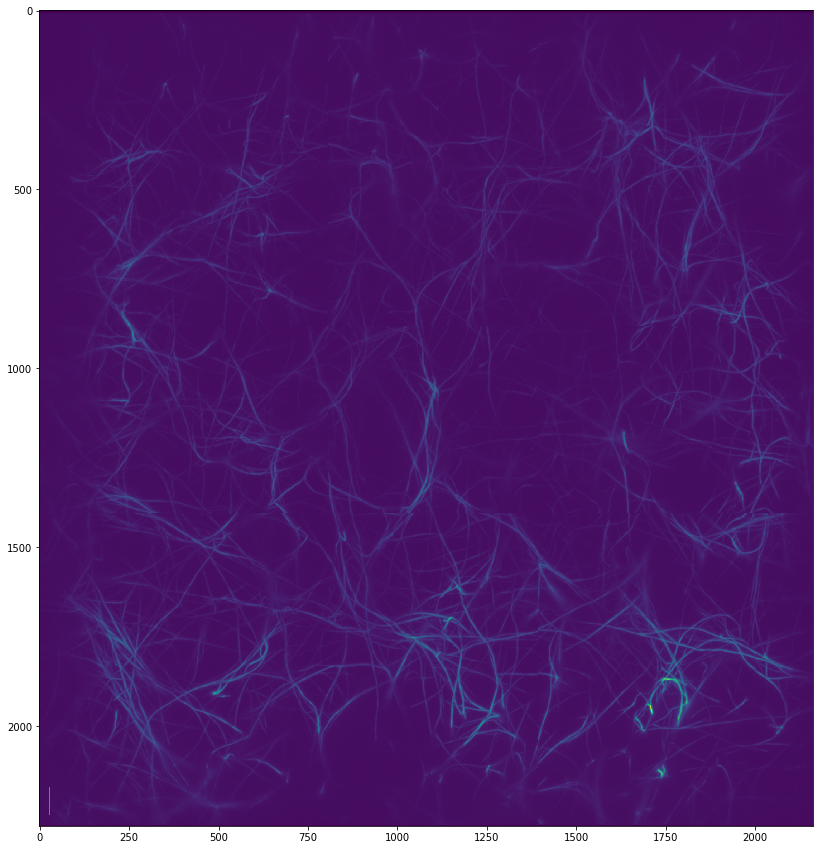

In [234]:
ta=stitch_3x3_XY(ts1,du1=180,dd1=220, du2=350,dd2=360, overlap=False, showim=True, choosemax=False)
tb=stitch_3x3_XY(ts2,du1=180,dd1=220, du2=350,dd2=360, overlap=False, showim=True, choosemax=False)
tc=stitch_3x3_XY(ts3,du1=180,dd1=220, du2=350,dd2=360, overlap=False, showim=True, choosemax=False)